### Step1 - 导入相关包 & 初始化设置

In [ ]:
import os, sys

from langchain.agents import create_agent
from langchain.chat_models import init_chat_model
# 常用的消息类型
from langchain.messages import HumanMessage, SystemMessage, ToolMessage, AIMessage, AIMessageChunk

# 默读取当前目录下的 .env 文件, 可以通过 dotenv_path 来修改
from dotenv import load_dotenv
root_dir = os.path.dirname(os.getcwd())
load_dotenv(dotenv_path=os.path.join(root_dir, ".env"))

# 记录日志
from loguru import logger
logger.remove()
logger.add(sys.stderr, level=os.getenv("LOG_LEVEL"))

1

### Step2 - 创建 Agent 智能体

In [3]:
# 创建 ChatModel: v1 创建聊天模型的方法
chat_model = init_chat_model(
    model_provider="ollama",
    # model 也可以写为 <model_provider>:<model_name> 的形式
    # 这样就可以不用指定 model_provider 这个参数了
    model = os.getenv("OLLAMA_LLM_MODEL"),
    base_url = os.getenv("OLLAMA_BASE_URL"),
    max_tokens = 1024,
)
chat_model

ChatOllama(model='qwen3:4b-instruct', base_url='http://localhost:11434')

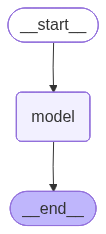

In [4]:
# 创建 Agent
agent = create_agent(
    model=chat_model,
    # 提示词可以不写, 这样也可以在调用时用 SystemMessage 来指定
    system_prompt="你是一个专业的AI助手, 请用简洁的方式回复用户的问题."
)
agent

### Step3 - 调用智能体

In [8]:
# 方法1: 非流式调用
# 也可以按照如下格式来写: {"messages":[{"role": "user", "content": "请简单介绍一下你自己."}]}
respone = agent.invoke({"messages":[HumanMessage("请简单介绍一下你自己.")]})
logger.debug(respone)

for msg in respone["messages"]:
    msg.pretty_print()

2025-12-05 21:44:49.726 | DEBUG    | __main__:<module>:4 - {'messages': [HumanMessage(content='请简单介绍一下你自己.', additional_kwargs={}, response_metadata={}, id='5c8bc06a-e333-45f1-b0df-26e8379d5e1b'), AIMessage(content='你好！我是一个AI助手，专注于提供准确、简洁的信息和帮助解决各种问题。我可以回答问题、提供建议、协助写作，还能进行逻辑推理和编程。无论你是想了解知识、解决问题，还是需要创意灵感，我都会尽力为你服务！😊', additional_kwargs={}, response_metadata={'model': 'qwen3:4b-instruct', 'created_at': '2025-12-05T13:44:49.7253476Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1301856400, 'load_duration': 237089000, 'prompt_eval_count': 33, 'prompt_eval_duration': 288934000, 'eval_count': 57, 'eval_duration': 753933900, 'logprobs': None, 'model_name': 'qwen3:4b-instruct', 'model_provider': 'ollama'}, id='lc_run--fad7e878-3450-4f35-8535-006e4256fc48-0', usage_metadata={'input_tokens': 33, 'output_tokens': 57, 'total_tokens': 90})]}


================================ Human Message =================================

请简单介绍一下你自己.
================================== Ai Message ==================================

你好！我是一个AI助手，专注于提供准确、简洁的信息和帮助解决各种问题。我可以回答问题、提供建议、协助写作，还能进行逻辑推理和编程。无论你是想了解知识、解决问题，还是需要创意灵感，我都会尽力为你服务！😊


In [ ]:
# 方法2: 流式调用 & stream_mode 为 values
for chunk in agent.stream(
    ({"messages":[HumanMessage("请简单介绍一下你自己.")]}),
    stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

请简单介绍一下你自己.
================================== Ai Message ==================================

你好！我是一个AI助手，可以帮你回答问题、提供信息、撰写文字，甚至进行逻辑推理和编程。无论你是想了解某个知识点，还是需要帮助写一段文字，我都会尽力提供准确、简洁的回答。有什么我可以帮你的吗？ 😊


In [11]:
# 方法3: 流式调用 & stream_mode 为 messages
for chunk in agent.stream(
    {"messages":[HumanMessage("请简单介绍一下你自己.")]},
    stream_mode="messages"):
    # logger.debug(chunk)
    # ( AIMessageChunk(content='月', additional_kwargs={}, response_metadata={}, id='lc_run--b8d9f214-6fc9-4ba3-8a6b-66471899635c'), 
    # {'langgraph_step': 3, 'langgraph_node': 'model', 'langgraph_triggers': ('branch:to:model',), 
    #  'langgraph_path': ('__pregel_pull', 'model'), 
    #  'langgraph_checkpoint_ns': 'model:7a7be4dc-94fb-6539-aed3-cba6c99c2863', 
    #  'checkpoint_ns': 'model:7a7be4dc-94fb-6539-aed3-cba6c99c2863', 
    #  'ls_provider': 'ollama', 'ls_model_name': 'qwen3:4b-instruct', 'ls_model_type': 'chat', 'ls_temperature': None
    # })
    if isinstance(chunk[0], AIMessageChunk):
        print(chunk[0].content, end="", flush=True)


你好！我是一个AI助手，专注于提供准确、有用的信息和帮助解决问题。我可以回答问题、提供建议、协助写作、解释概念等。如果你有任何需要，随时告诉我！😊